<a href="https://colab.research.google.com/github/nagarad/OCR/blob/main/ocr_proj_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib import image as mpimg
import glob
import cv2
import matplotlib.image as mpimg
from PIL import Image


In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import sys
import PIL
import easyocr

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract as pt
windows_path = r'C:\Users\NAGARAD\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'


In [ ]:
pt.pytesseract.tesseract_cmd = windows_path


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor

feature_extractor = LayoutLMv2FeatureExtractor()
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)
     

In [ ]:
path = '/content/sample_data/OCRImages'

In [ ]:
print(os.listdir(path))

['0060059322.tif', '92204693_gt.xml', '2085538756_ocr.xml', '518253689+-3695_gt.xml', '83553577_3578_gt.xml', '2024485248_gt.xml', '91543951_3952_ocr.xml', '2023592678.tif', '513167179_gt.xml', '2084022002.tif', '2042356681.tif', '0060032065_gt.xml', '0060173965_ocr.xml', '2026000180_ocr.xml', '2072957848_gt.xml', '80702654.tif', '0060091768_gt.xml', '2084022128_gt.xml', '518232323+-2324_ocr.xml', '2026000180.tif', '2063650388.tif', '2084022136_gt.xml', '2047260303_gt.xml', '0071005934_ocr.xml', '2062100711_gt.xml', '2041531738_1761_gt.xml', '2015020047_ocr.xml', 'ti16400164_gt.xml', '11315942_ocr.xml', '50120516-0516_gt.xml', '514802406+-2409_gt.xml', '2084021870_ocr.xml', '0060027425.tif', '2073883306_ocr.xml', '2084022136.tif', '526450292+-0292.tif', '2050763071.tif', 'CTRCONTRACTS011517-1_gt.xml', '2071021272_gt.xml', '513162677_gt.xml', '2063249953.tif', '2043396778_ocr.xml', '2041531460_ocr.xml', '2063319693_ocr.xml', '0060060466_gt.xml', '2085699260_gt.xml', '514218180+-8181.tif

In [ ]:
for image in os.listdir(path):
    print(image)

0060059322.tif
92204693_gt.xml
2085538756_ocr.xml
518253689+-3695_gt.xml
83553577_3578_gt.xml
2024485248_gt.xml
91543951_3952_ocr.xml
2023592678.tif
513167179_gt.xml
2084022002.tif
2042356681.tif
0060032065_gt.xml
0060173965_ocr.xml
2026000180_ocr.xml
2072957848_gt.xml
80702654.tif
0060091768_gt.xml
2084022128_gt.xml
518232323+-2324_ocr.xml
2026000180.tif
2063650388.tif
2084022136_gt.xml
2047260303_gt.xml
0071005934_ocr.xml
2062100711_gt.xml
2041531738_1761_gt.xml
2015020047_ocr.xml
ti16400164_gt.xml
11315942_ocr.xml
50120516-0516_gt.xml
514802406+-2409_gt.xml
2084021870_ocr.xml
0060027425.tif
2073883306_ocr.xml
2084022136.tif
526450292+-0292.tif
2050763071.tif
CTRCONTRACTS011517-1_gt.xml
2071021272_gt.xml
513162677_gt.xml
2063249953.tif
2043396778_ocr.xml
2041531460_ocr.xml
2063319693_ocr.xml
0060060466_gt.xml
2085699260_gt.xml
514218180+-8181.tif
2055018950.tif
0001144288_gt.xml
2073883308.tif
512981614_ocr.xml
2063610172.tif
507876895.tif
2085699682_ocr.xml
2040735287.tif
2044444071

In [ ]:
tifs, gts, ocrs, oths = [], [], [], []



for i in os.listdir(path):

    if i.endswith('.tif'):
        tifs.append(i)
    elif i.endswith('_gt.xml'):
        gts.append(i)
    elif i.endswith('_ocr.xml'):
        ocrs.append(i)
    else:
        oths.append(i)



In [ ]:
print(tifs)

['0060059322.tif', '2023592678.tif', '2084022002.tif', '2042356681.tif', '80702654.tif', '2026000180.tif', '2063650388.tif', '0060027425.tif', '2084022136.tif', '526450292+-0292.tif', '2050763071.tif', '2063249953.tif', '514218180+-8181.tif', '2055018950.tif', '2073883308.tif', '2063610172.tif', '507876895.tif', '2040735287.tif', '86618995.tif', '2084021799.tif', '2029200005.tif', '507484246.tif', '2062100711.tif', '2044694612.tif', '2064225959.tif', '2085699260.tif', '2505118349.tif', '0060181312.tif', '86462933.tif', '2048616045_6046.tif', '2070750524.tif', 'ti16311156.tif', '0001136521.tif', '83096187.tif', '92204693.tif', '2041158261.tif', '2063235029.tif', '500124393+-4395.tif', '0060091768.tif', '0060094811.tif', '83565210_5211.tif', '83312574_2575.tif', '0011899826.tif', '94389911.tif', '2084024707.tif', '93413397.tif', '87021931.tif', '83542445_2446.tif', '518253587+-3590.tif', '518259424+-9431.tif', '2084022167.tif', '2028811996.tif', '0060085465.tif', '91781209.tif', '2063208

In [ ]:
all_files = tifs + gts + ocrs
ids = [i.replace('.tif', '').replace('_gt.xml','').replace('_ocr.xml','') for i in all_files]


In [ ]:
ids

['0060059322',
 '2023592678',
 '2084022002',
 '2042356681',
 '80702654',
 '2026000180',
 '2063650388',
 '0060027425',
 '2084022136',
 '526450292+-0292',
 '2050763071',
 '2063249953',
 '514218180+-8181',
 '2055018950',
 '2073883308',
 '2063610172',
 '507876895',
 '2040735287',
 '86618995',
 '2084021799',
 '2029200005',
 '507484246',
 '2062100711',
 '2044694612',
 '2064225959',
 '2085699260',
 '2505118349',
 '0060181312',
 '86462933',
 '2048616045_6046',
 '2070750524',
 'ti16311156',
 '0001136521',
 '83096187',
 '92204693',
 '2041158261',
 '2063235029',
 '500124393+-4395',
 '0060091768',
 '0060094811',
 '83565210_5211',
 '83312574_2575',
 '0011899826',
 '94389911',
 '2084024707',
 '93413397',
 '87021931',
 '83542445_2446',
 '518253587+-3590',
 '518259424+-9431',
 '2084022167',
 '2028811996',
 '0060085465',
 '91781209',
 '2063208746',
 '503918489+-8489',
 '506413423',
 '2073883150',
 '2062543842',
 '2080705096',
 '2085538659',
 '82898524',
 '11024285',
 '2030138139',
 '2084022184',
 '2024

In [ ]:
list_2 = list((tifs))

In [ ]:
list_2

['0060059322.tif',
 '2023592678.tif',
 '2084022002.tif',
 '2042356681.tif',
 '80702654.tif',
 '2026000180.tif',
 '2063650388.tif',
 '0060027425.tif',
 '2084022136.tif',
 '526450292+-0292.tif',
 '2050763071.tif',
 '2063249953.tif',
 '514218180+-8181.tif',
 '2055018950.tif',
 '2073883308.tif',
 '2063610172.tif',
 '507876895.tif',
 '2040735287.tif',
 '86618995.tif',
 '2084021799.tif',
 '2029200005.tif',
 '507484246.tif',
 '2062100711.tif',
 '2044694612.tif',
 '2064225959.tif',
 '2085699260.tif',
 '2505118349.tif',
 '0060181312.tif',
 '86462933.tif',
 '2048616045_6046.tif',
 '2070750524.tif',
 'ti16311156.tif',
 '0001136521.tif',
 '83096187.tif',
 '92204693.tif',
 '2041158261.tif',
 '2063235029.tif',
 '500124393+-4395.tif',
 '0060091768.tif',
 '0060094811.tif',
 '83565210_5211.tif',
 '83312574_2575.tif',
 '0011899826.tif',
 '94389911.tif',
 '2084024707.tif',
 '93413397.tif',
 '87021931.tif',
 '83542445_2446.tif',
 '518253587+-3590.tif',
 '518259424+-9431.tif',
 '2084022167.tif',
 '20288119

In [ ]:
img_shape=[]
img_size=[]

for i in list_2:
    image = mpimg.imread(path + '/' + i)
    img_shape.append(image.shape)
    img_size.append(image.size)



In [ ]:
img_size

[762000,
 777000,
 754000,
 766000,
 754000,
 777000,
 779000,
 762000,
 754000,
 754000,
 773000,
 754000,
 754000,
 754000,
 754000,
 769000,
 781000,
 768000,
 754000,
 754000,
 781000,
 777000,
 793000,
 774000,
 754000,
 754000,
 754000,
 762000,
 754000,
 754000,
 754000,
 754000,
 762000,
 754000,
 781000,
 754000,
 754000,
 754000,
 762000,
 762000,
 754000,
 754000,
 762000,
 777000,
 754000,
 754000,
 754000,
 754000,
 754000,
 754000,
 754000,
 777000,
 762000,
 754000,
 754000,
 754000,
 780000,
 754000,
 768000,
 754000,
 754000,
 777000,
 771000,
 785000,
 754000,
 777000,
 754000,
 802000,
 754000,
 754000,
 754000,
 754000,
 767000,
 754000,
 754000,
 762000,
 754000,
 752000,
 754000,
 802000,
 792000,
 754000,
 777000,
 762000,
 754000,
 780000,
 762000,
 802000,
 771000,
 762000,
 754000,
 754000,
 754000,
 783000,
 802000,
 777000,
 754000,
 754000,
 785000,
 776000,
 754000,
 762000,
 762000,
 781000,
 773000,
 771000,
 754000,
 754000,
 762000,
 780000,
 754000,
 

In [ ]:
img_shape

[(1000, 762),
 (1000, 777),
 (1000, 754),
 (1000, 766),
 (1000, 754),
 (1000, 777),
 (1000, 779),
 (1000, 762),
 (1000, 754),
 (1000, 754),
 (1000, 773),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 769),
 (1000, 781),
 (1000, 768),
 (1000, 754),
 (1000, 754),
 (1000, 781),
 (1000, 777),
 (1000, 793),
 (1000, 774),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 762),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 762),
 (1000, 754),
 (1000, 781),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 762),
 (1000, 762),
 (1000, 754),
 (1000, 754),
 (1000, 762),
 (1000, 777),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 777),
 (1000, 762),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000, 780),
 (1000, 754),
 (1000, 768),
 (1000, 754),
 (1000, 754),
 (1000, 777),
 (1000, 771),
 (1000, 785),
 (1000, 754),
 (1000, 777),
 (1000, 754),
 (1000, 802),
 (1000, 754),
 (1000, 754),
 (1000, 754),
 (1000

In [ ]:
del list

In [ ]:
list = list(zip(ids,tifs,ocrs,gts,img_size,img_shape))

In [ ]:
df = pd.DataFrame(list, columns=['ids','ocr','xml','tif','size','shape'])
df

ids                  ocr                      xml  \
0         0060059322       0060059322.tif       2085538756_ocr.xml   
1         2023592678       2023592678.tif    91543951_3952_ocr.xml   
2         2084022002       2084022002.tif       0060173965_ocr.xml   
3         2042356681       2042356681.tif       2026000180_ocr.xml   
4           80702654         80702654.tif  518232323+-2324_ocr.xml   
..               ...                  ...                      ...   
477       0011500947       0011500947.tif       0060053761_ocr.xml   
478  2063207059_7062  2063207059_7062.tif       2050763071_ocr.xml   
479       ti16801274       ti16801274.tif         86087013_ocr.xml   
480         83565418         83565418.tif       2028729078_ocr.xml   
481       2015003772       2015003772.tif       2029370804_ocr.xml   

                        tif    size        shape  
0           92204693_gt.xml  762000  (1000, 762)  
1    518253689+-3695_gt.xml  777000  (1000, 777)  
2      83553577_3578_gt.xml  754000  (1000, 754)  
3         2024485248_gt.xml  766000  (1000, 766)  
4          513167179_gt.xml  754000  (1000, 754)  
..                      ...     ...          ...  
477  518492684+-2684_gt.xml  771000  (1000, 771)  
478       0060063491_gt.xml  754000  (1000, 754)  
479       2501605386_gt.xml  754000  (1000, 754)  
480       2085540098_gt.xml  754000  (1000, 754)  
481       0001136521_gt.xml  777000  (1000, 777)  

[482 rows x 6 columns]

In [ ]:
df.isnull().sum()

ids      0
ocr      0
xml      0
tif      0
size     0
shape    0
dtype: int64

In [ ]:
print(df.shape)


(482, 6)


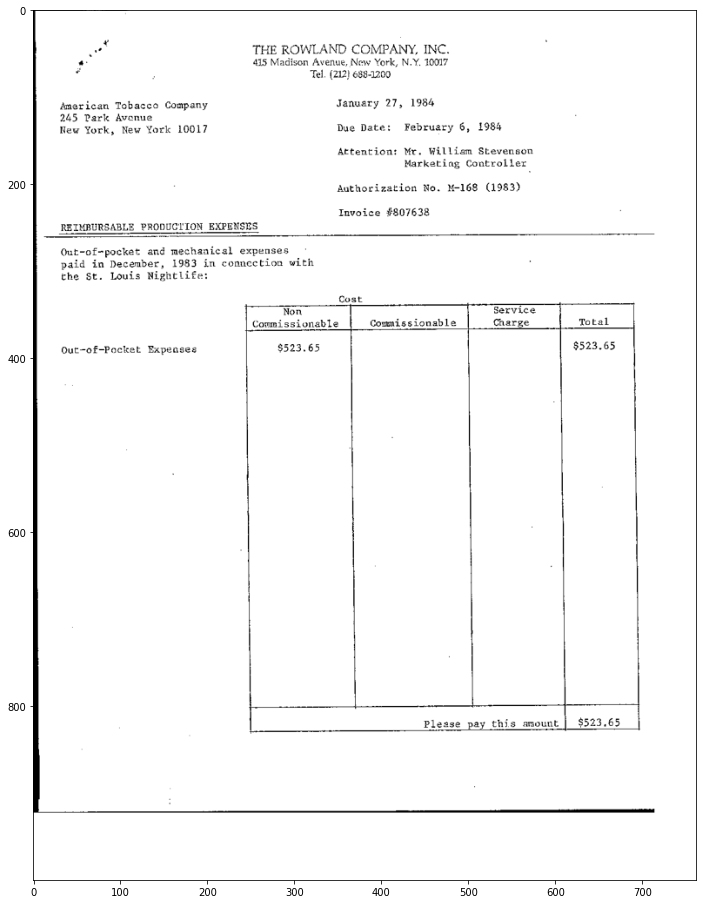

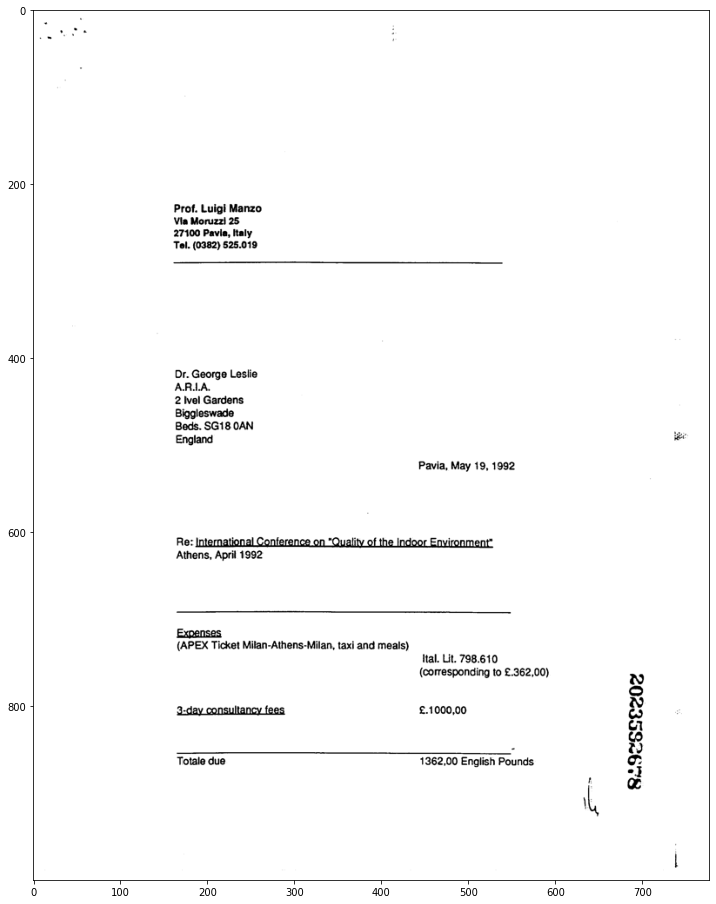

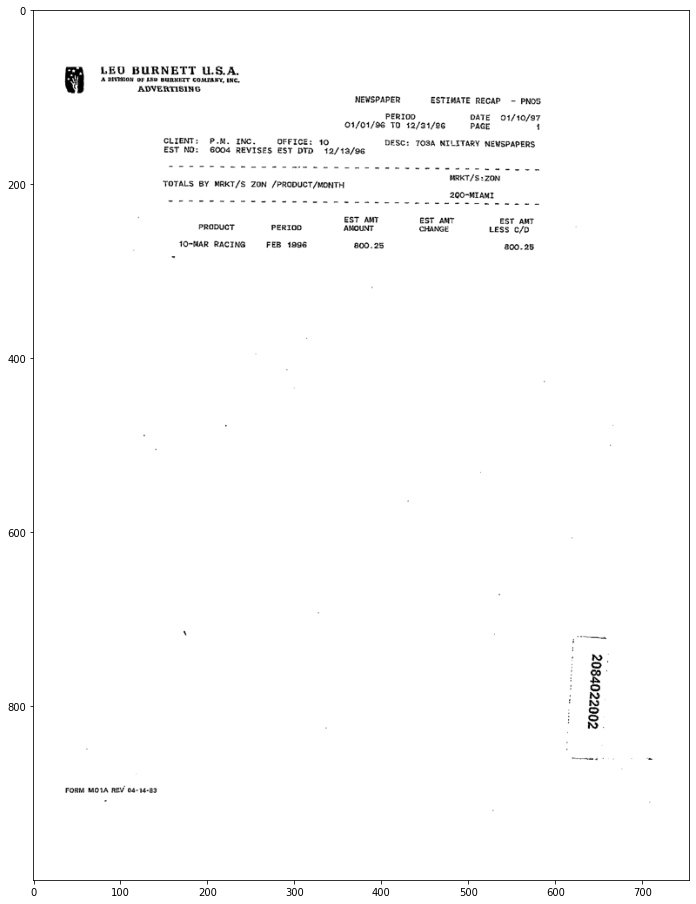

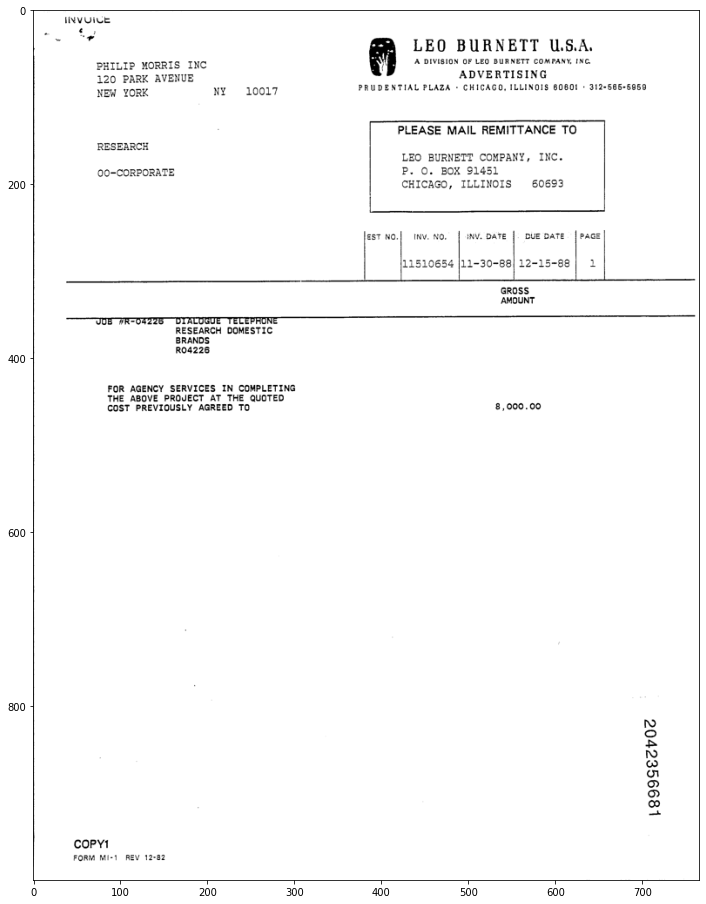

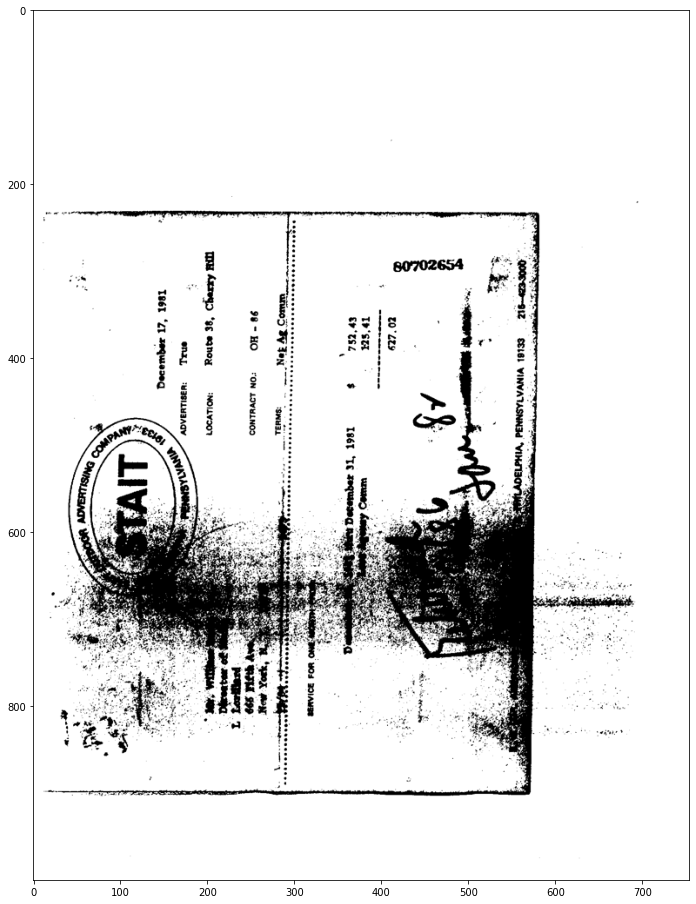

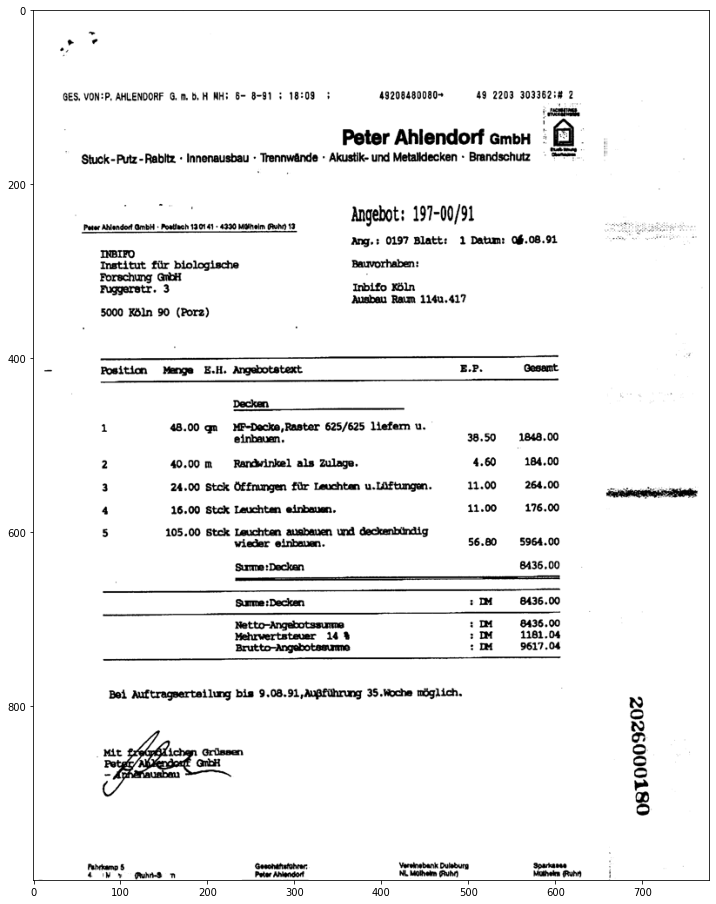

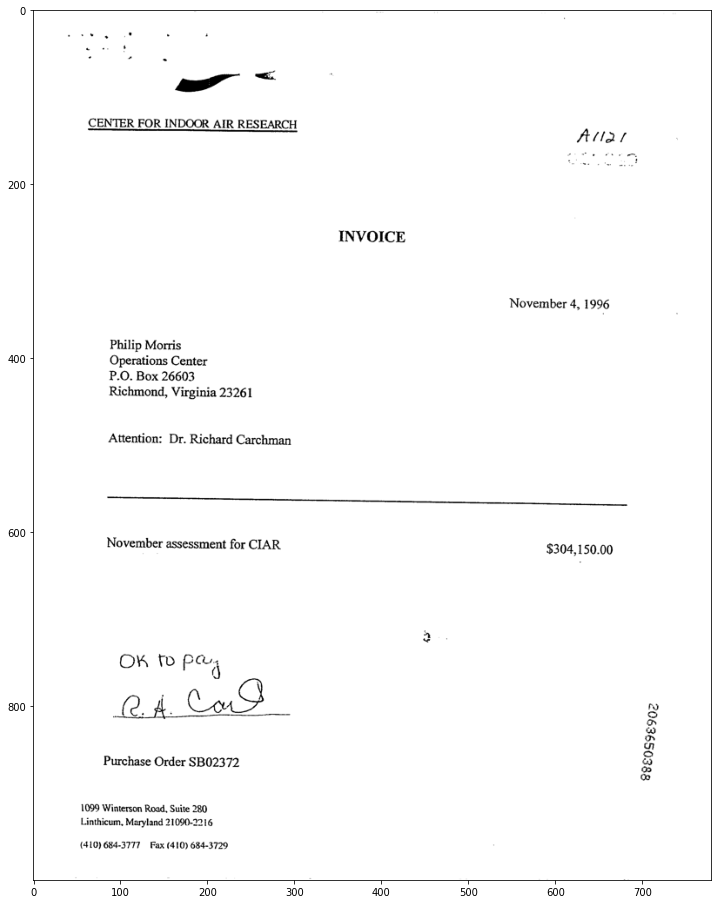

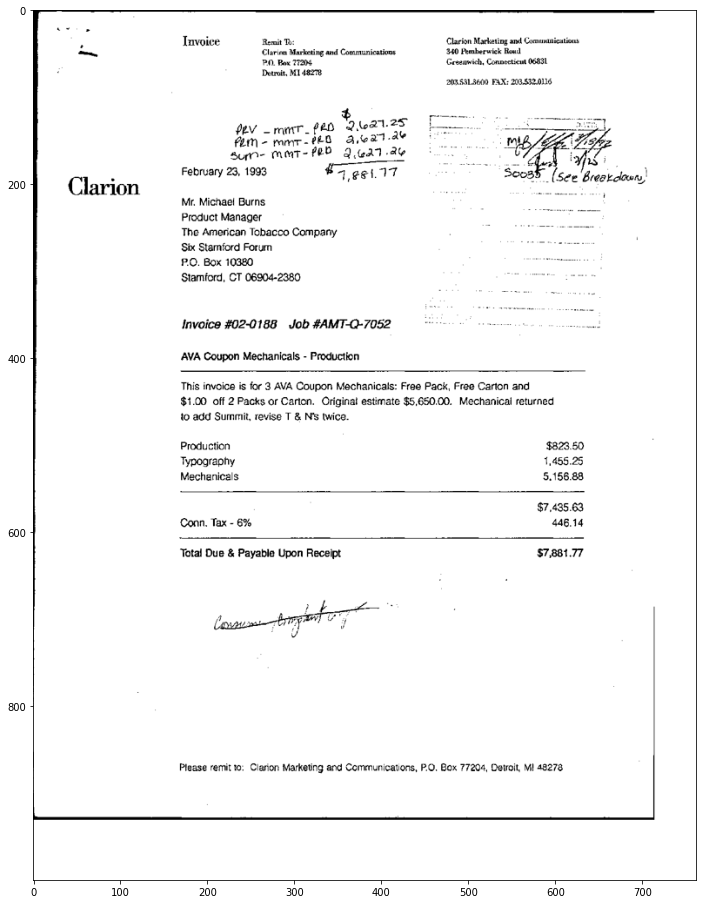

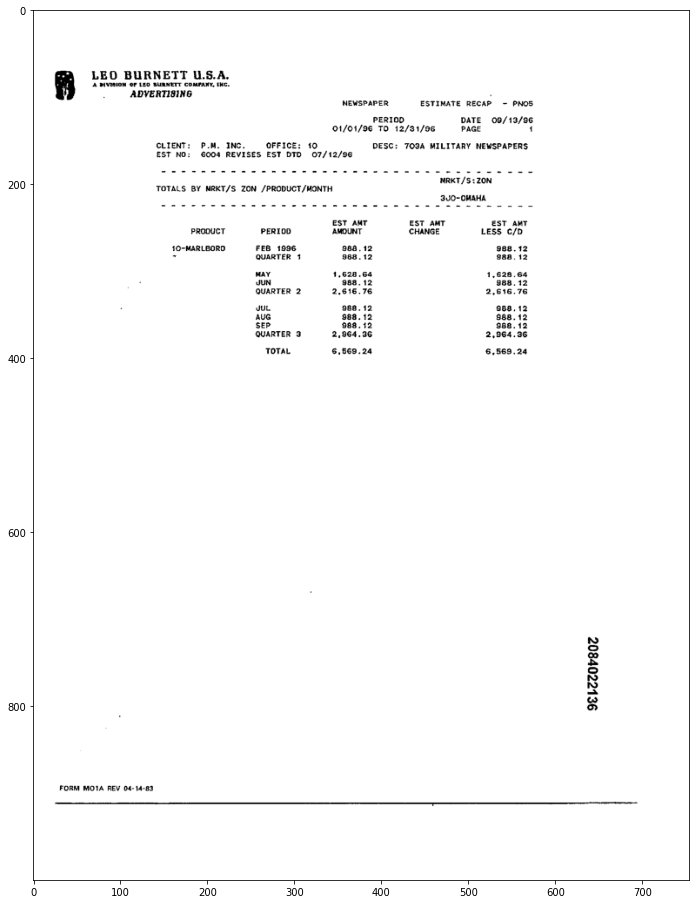

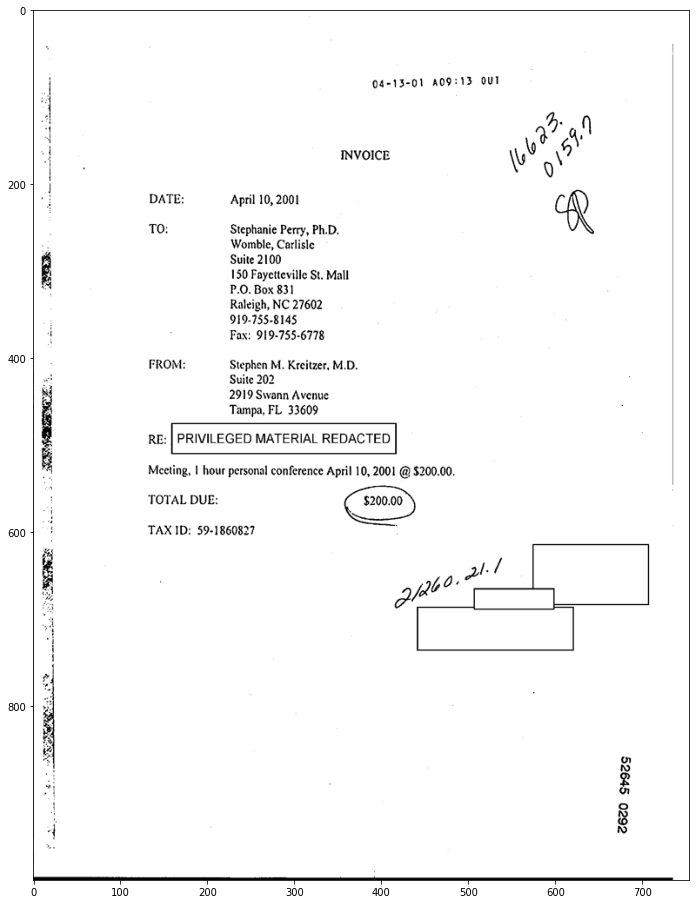

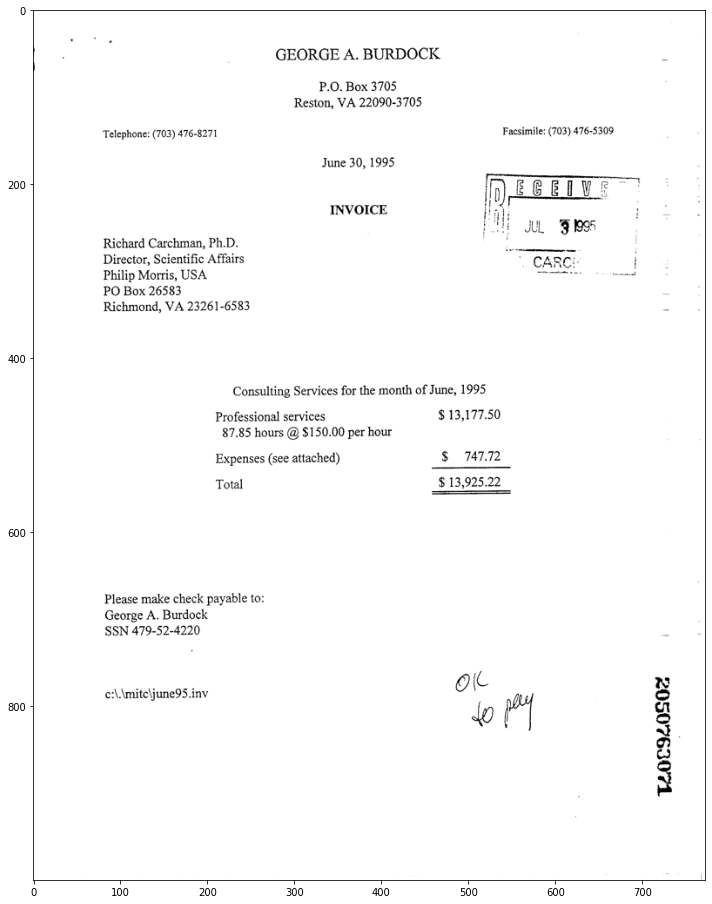

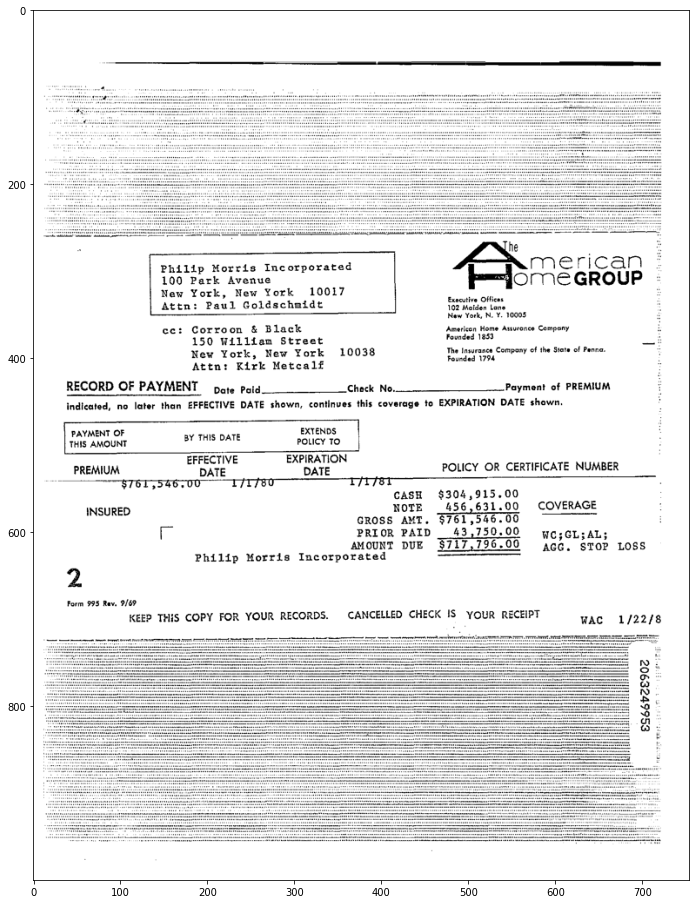

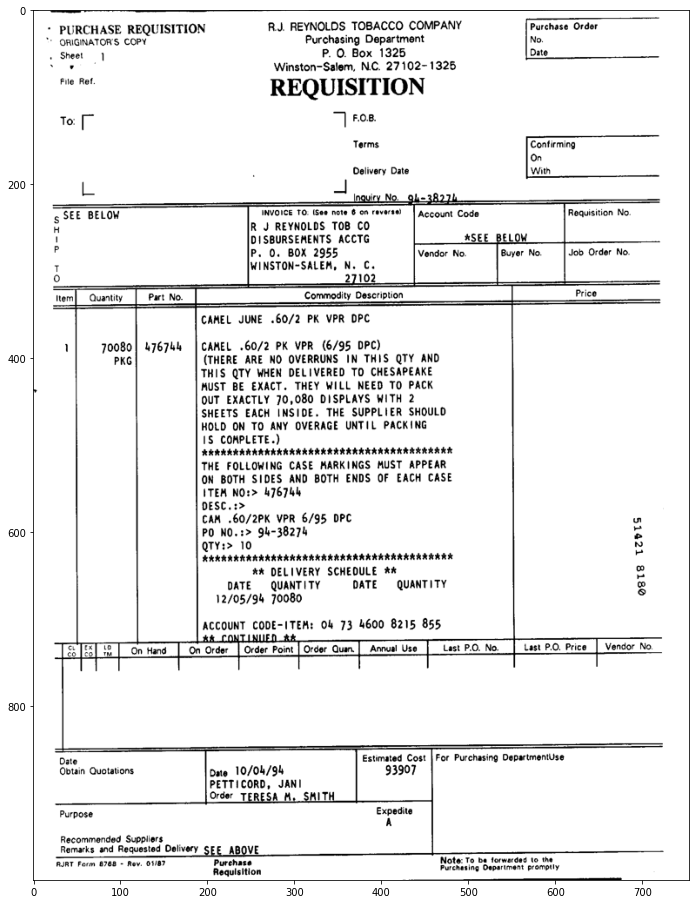

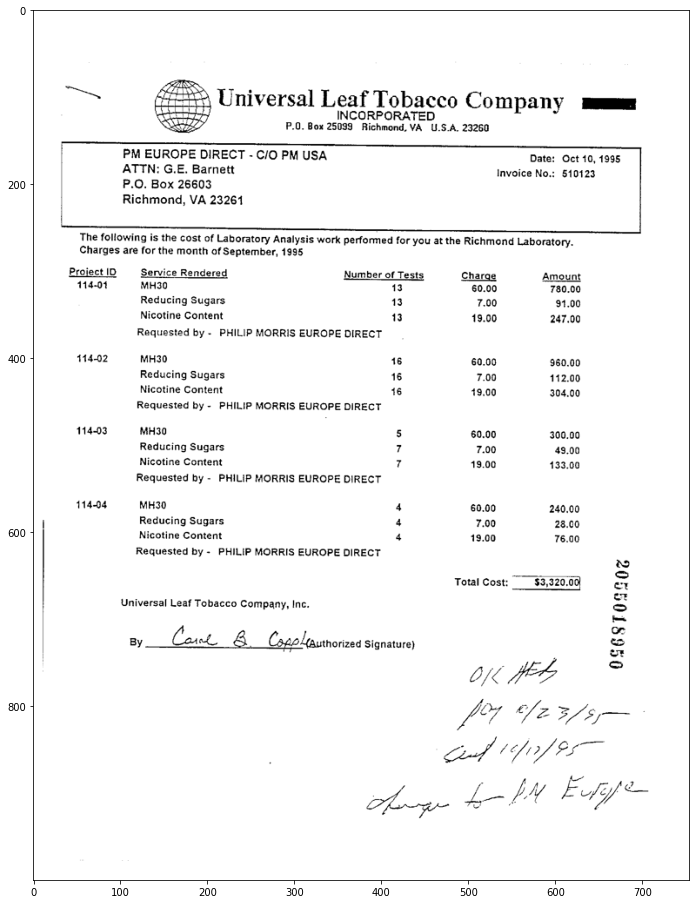

KeyboardInterrupt: ignored

In [ ]:
for i in list_2:
    image = mpimg.imread(path + '/' + i)
    plt.imshow(image,cmap = 'gray')
    f = plt.gcf()
    f.set_size_inches(24.5, 16)
    plt.show()


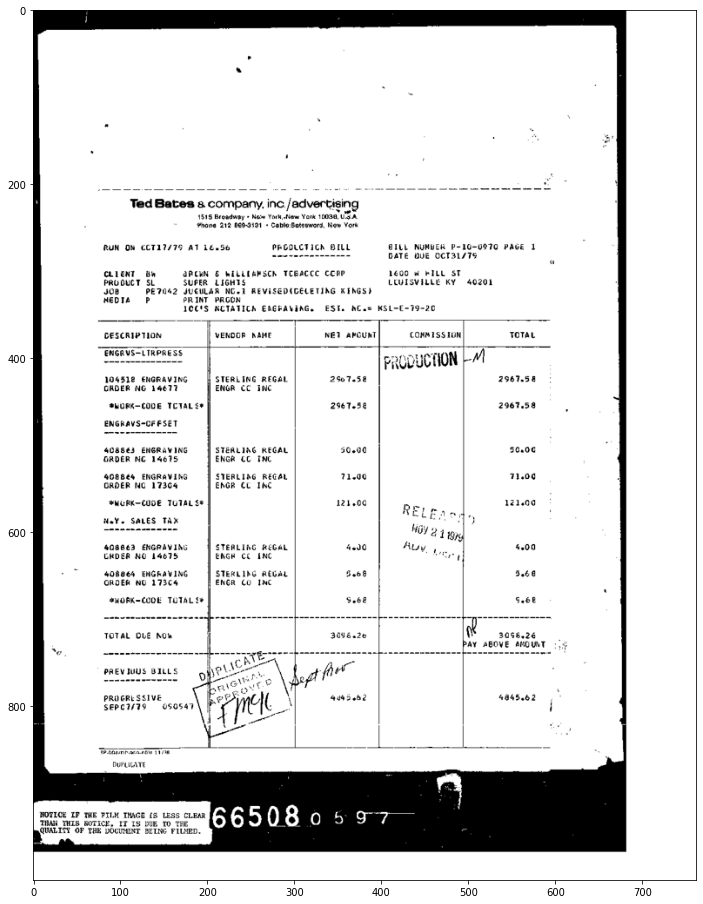

In [ ]:
image = cv2.imread(path + '/' + '0001139716.tif')

plt.imshow(image,cmap = 'gray')
f = plt.gcf()
f.set_size_inches(24.5, 16)
plt.show()


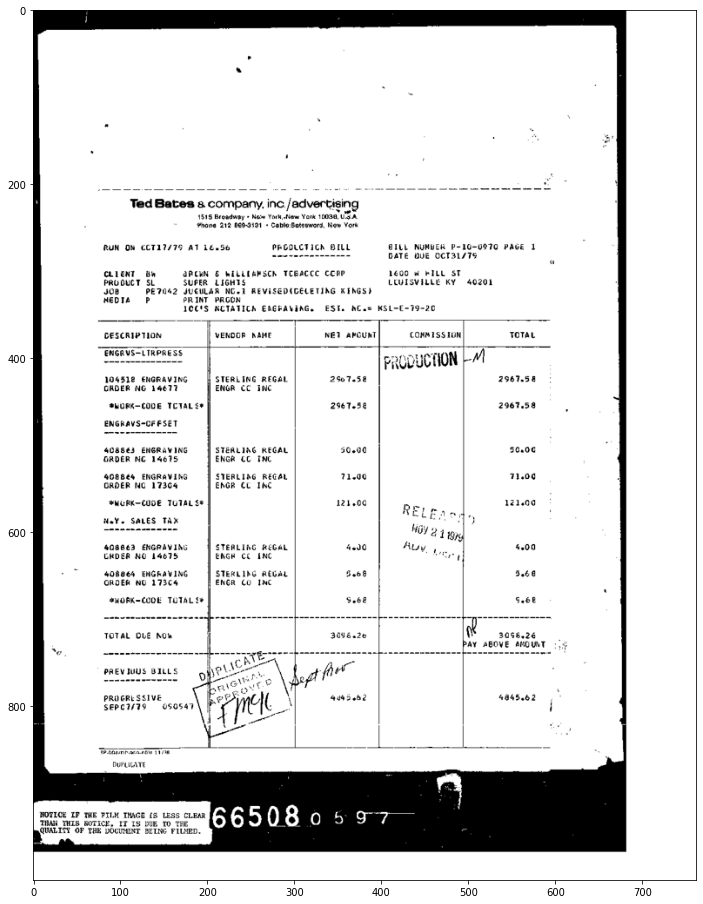

In [ ]:
image = cv2.imread(path + '/' + '0001139716.tif')
plt.imshow(image,cmap = 'gray')
f = plt.gcf()
f.set_size_inches(24.5, 16)
plt.show()



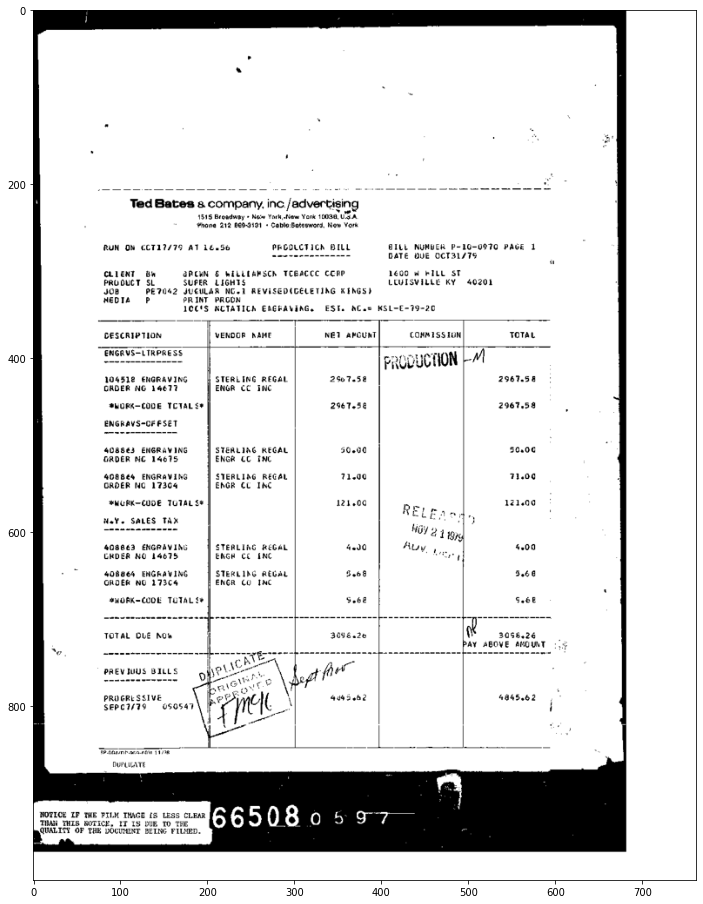

In [ ]:
image = mpimg.imread(path + '/' + '0001139716.tif')
plt.imshow(image,cmap = 'gray')
f = plt.gcf()
f.set_size_inches(24.5, 16)
plt.show()

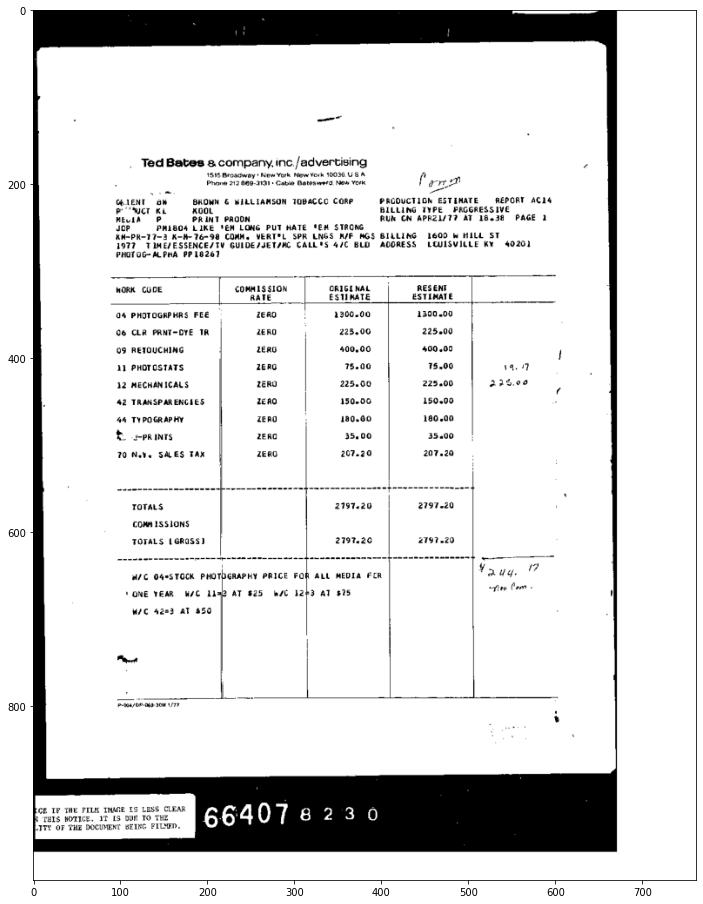

In [ ]:
image = cv2.imread(path + '/' + '0001136521.tif')
plt.imshow(image,cmap = 'gray')
f = plt.gcf()
f.set_size_inches(24.5, 16)
plt.show()


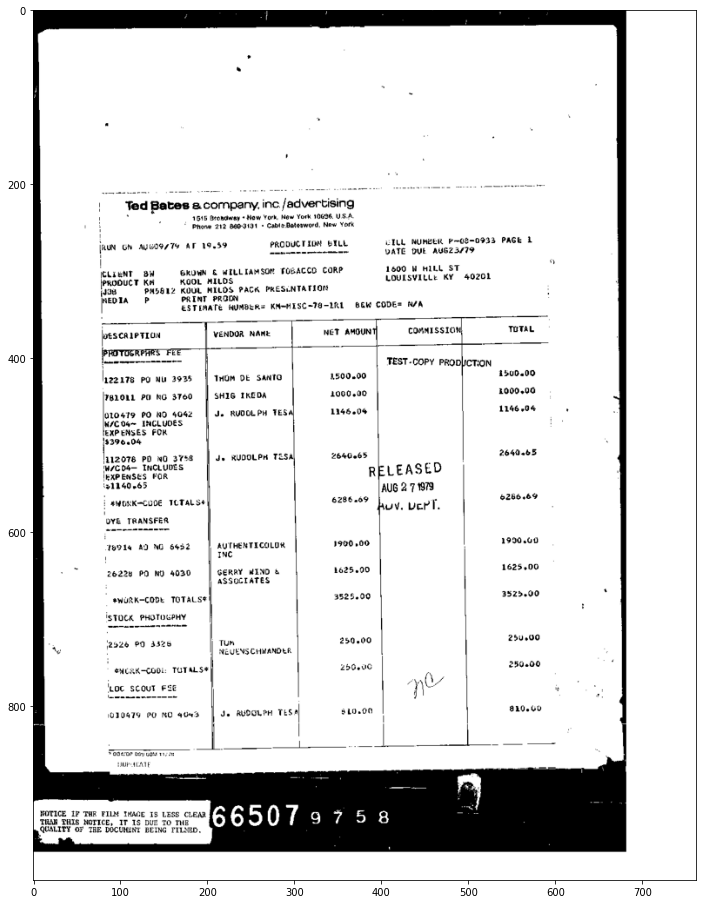

In [ ]:
image = cv2.imread('/content/sample_data/OCRImages/0001139626.tif')
plt.imshow(image,cmap = 'gray')
f = plt.gcf()
f.set_size_inches(24.5, 16)
plt.show()


In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
result = reader.readtext('/content/sample_data/OCRImages/0000223278.tif')
print(result)

[([[154, 72], [264, 72], [264, 96], [154, 96]], 'BAT(UK', 0.7727971962746893), ([[269, 81], [305, 81], [305, 95], [269, 95]], 'AND', 0.9960929736485423), ([[305, 75], [475, 75], [475, 95], [305, 95]], 'EXPORT) LMMTTED', 0.4437900467334714), ([[157, 107], [475, 107], [475, 125], [157, 125]], 'Export Houge Woklng Surrey GUZI IYB Englend', 0.5333887005814542), ([[405, 147], [521, 147], [521, 159], [405, 159]], 'Tolephone Woking 78142', 0.1539725482977407), ([[112, 156], [146, 156], [146, 164], [112, 164]], 'Lrow', 0.31581202149391174), ([[165, 153], [239, 153], [239, 167], [165, 167]], 'Villiamson', 0.7409015510566289), ([[243, 153], [335, 153], [335, 165], [243, 165]], 'Internatiorie]', 0.5158560006151429), ([[406, 160], [536, 160], [536, 168], [406, 168]], 'fuleeripbic Acdragb EIcorl', 0.08303237887010756), ([[534, 157], [575, 157], [575, 171], [534, 171]], 'Wokinz', 0.10804898261589405), ([[111, 167], [141, 167], [141, 181], [111, 181]], '3080', 0.6277172565460205), ([[145, 167], [183,

In [ ]:
path_test = '/content/sample_data/OCR_Image_Test'
print(os.listdir(path_test))

['518492684+-2684.tif', '521107137+-7140.tif', '518491313+-1315.tif', '518284421+-4430.tif', '518284417+-4420.tif']


In [ ]:
new_df= []



for i in os.listdir(path_test):
    new_df.append(i)

In [ ]:
reader = easyocr.Reader(['en'])
img_number = 1
df = pd.DataFrame()

for i in new_df:
    print(i)
    image = mpimg.imread(path_test + '/' + i)
    result = reader.readtext(image)
    df=df.append(pd.DataFrame({'image':i, 'detected_text':result[0]}))
    img_number +=1

518492684+-2684.tif
521107137+-7140.tif
518491313+-1315.tif
518284421+-4430.tif
518284417+-4420.tif


In [ ]:
df.head()

image                                     detected_text
0  518492684+-2684.tif      [[103, 65], [169, 65], [169, 83], [103, 83]]
1  518492684+-2684.tif                                          TPSO2SUN
2  518492684+-2684.tif                                          0.910962
0  521107137+-7140.tif  [[358, 118], [388, 118], [388, 126], [358, 126]]
1  521107137+-7140.tif                                            Jeeouh